In [82]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figures

In [2]:
# read in all the words
words = open('data/names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [84]:
# build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [85]:
# build the dataset
# 用前三个预测下一个字符
block_size = 3 # context length: how many characters do we take to predict the next one?
X, Y = [], []
for w in words:
  
  #print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    #print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix] # crop and append
  
X = torch.tensor(X)
Y = torch.tensor(Y)

In [86]:
g = torch.Generator().manual_seed(2147483647)  # for reproducibility
C  = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [87]:
for p in parameters:
    p.requires_grad = True

In [88]:
for _ in range(10):
    emb = C[X]
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y)
    print(loss.item())
    for p in parameters:
        p.grad = None
    loss.backward()
    for p in parameters:
        p.data += -0.1 * p.grad

19.505229949951172
17.084476470947266
15.776530265808105
14.833341598510742
14.002607345581055
13.253263473510742
12.57992172241211
11.983102798461914
11.47049331665039
11.051855087280273


In [89]:
torch.randint(0, X.shape[0], (32, ))

tensor([123153,  89500, 211037, 178404,  29277,  47416,  78508,  91847,  42146,
        106468, 200019, 204633,  28893,  96862, 123229, 189940, 182669, 191052,
         63774, 204671,  11961,  89171, 104895,  32078,  94928,  25758, 211513,
         70010, 103428, 213695, 183981, 107050])

In [90]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10 ** lre
lrs

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

In [104]:
lri = []
lossi = []


for i in range(10000):

    # minibatch construct
    ix = torch.randint(0, X.shape[0], (320,))

    emb = C[X[ix]]
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y[ix])
    # print(loss.item())
    for p in parameters:
        p.grad = None
    loss.backward()

    # lr = lrs[i]
    for p in parameters:
        # p.data += -lr * p.grad
        p.data += -0.01 * p.grad

    # trak stats
    lri.append(lr)
    lossi.append(loss.item())
print(loss.item())

2.3273704051971436


In [105]:
# 上面是minibath 每次取出32个，拿这32个的梯度，这里的是所有样本总的loss
emb = C[X]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y)
loss

tensor(2.3150, grad_fn=<NllLossBackward0>)

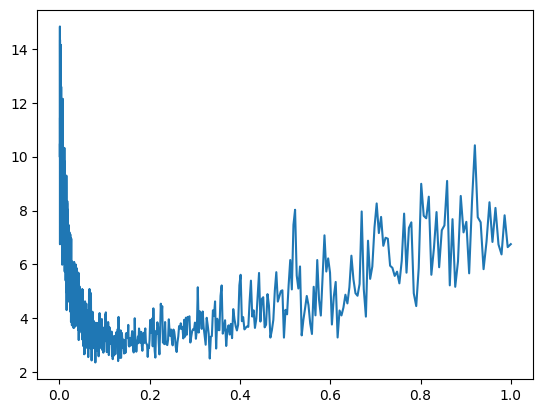

In [93]:
plt.plot(lri, lossi)

In [106]:
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):
    out = []
    context = [0] * block_size  # 初始化上下文，全 0
    while True:
        emb = C[torch.tensor([context])]      # 取 embedding，shape (1, block_size, d)
        h = torch.tanh(emb.view(1, -1) @ W1 + b1)  # 经过第一层
        logits = h @ W2 + b2                       # 输出 logits
        probs = F.softmax(logits, dim=1)           # 转概率分布

        ix = torch.multinomial(probs, num_samples=1, generator=g).item()

        context = context[1:] + [ix]  # 滑动窗口：丢掉最前面，加上新 token
        out.append(ix)
        if ix == 0:  # 如果采样到 “终止符”
            break
    print(''.join(itos[i] for i in out))





carmahelai.
havitkimri.
reviy.
srandane.
rahnen.
deliyat.
kaquiu.
ramara.
chaiiv.
kaleig.
hham.
join.
quinn.
sroilea.
jadbi.
wazero.
dearyni.
jaxe.
pirsan.
edde.
